# 06-1 객체지향 API로 그래프 꾸미기

*이탤릭체 텍스트*## pyplot 방식과 객체지향 API 방식

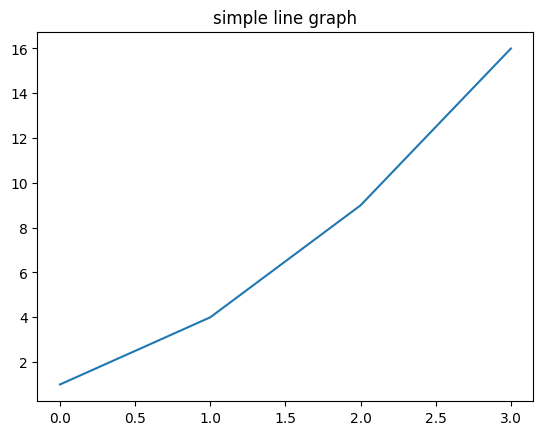

In [1]:
# pyplot 방식
import matplotlib.pyplot as plt

plt.plot([1, 4, 9, 16])
plt.title('simple line graph')
plt.show()

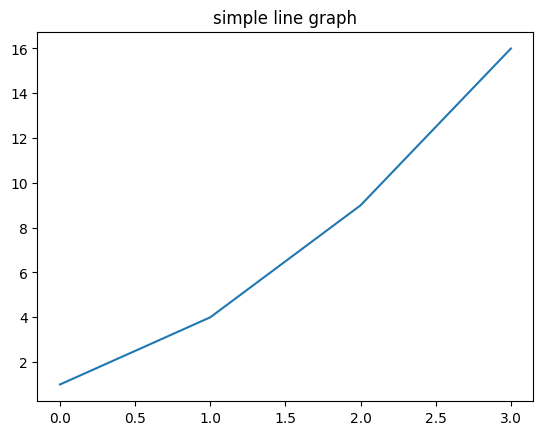

In [2]:
# 객체지향 API 방식
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1, 4, 9, 16])
ax.set_title('simple line graph')
fig.show()

## 그래프에 한글 출력하기

이 노트북은 맷플롯립 그래프에 한글을 쓰기 위해 나눔 폰트를 사용합니다. 코랩의 경우 다음 셀에서 나눔 폰트를 직접 설치합니다.

In [3]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
# 기존 폰트
plt.rcParams['font.family']

['sans-serif']

In [6]:
# 폰트 변경 방법 1
plt.rcParams['font.family'] = 'NanumGothic'

In [7]:
# 폰트 변경 방법 2
plt.rc('font', family='NanumBarunGothic')

In [8]:
plt.rc('font', family='NanumBarunGothic', size=11)

In [9]:
print(plt.rcParams['font.family'], plt.rcParams['font.size'])

['NanumBarunGothic'] 11.0


In [10]:
# 설치된 폰트 조회
from matplotlib.font_manager import findSystemFonts
findSystemFonts()

['/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 

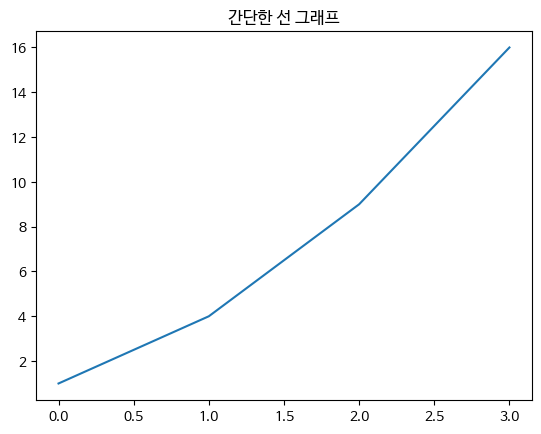

In [13]:
import matplotlib.pyplot as plt

plt.plot([1, 4, 9, 16])
plt.title('간단한 선 그래프')
plt.show()

In [12]:
plt.rc('font', size=10)

## 출판사별 발행 도서 개수 산점도 그리기

In [14]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 96.3MB/s]


'ns_book7.csv'

In [15]:
import pandas as pd

data = pd.read_csv('ns_book7.csv', low_memory=False)
data.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [16]:
top30 = data['출판사'].value_counts()[:30]
top30

,count
출판사,
문학동네,4410
민음사,3349
김영사,3246
웅진씽크빅,3227
시공사,2685
창비,2469
문학과지성사,2064
위즈덤하우스,1981
학지사,1877


In [17]:
top30_idx = data['출판사'].isin(top30.index)
top30_idx

,출판사
0,True
1,False
2,False
3,False
4,True
...,...
376765,False
376766,False
376767,True
376768,False


In [18]:
top30_idx.sum()

np.int64(51886)

In [20]:
data1=data[top30_idx].sample(1000,random_state=0)
data1.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
208909,225785,신뢰의 속도,스티븐 M. R. 코비 지음 ;김경섭;정병창 옮김,김영사,2009,9788934935391,NaN,0,NaN,325.04,1,29,2009-08-25
174082,189366,유로-아메리칸 시네마,피터 레브 지음,시공사,1997,9788972595861,NaN,9,NaN,688,1,1,2011-07-11
195937,212338,행정법 입문 =Introduction to administrative law,길준규 저,博英社,2010,9788964545454,NaN,9,NaN,363,1,16,2010-05-20
88142,97648,놈이었습니다 :이덕규 시집,지은이: 이덕규,문학동네,2015,9788954638432,NaN,0,77,811.608,1,3,2016-02-19
305479,326272,낙타는 무릎이 약하다,이순원 지음,랜덤하우스코리아,1996,9788946103016,NaN,0,NaN,813.6,1,3,2005-07-20


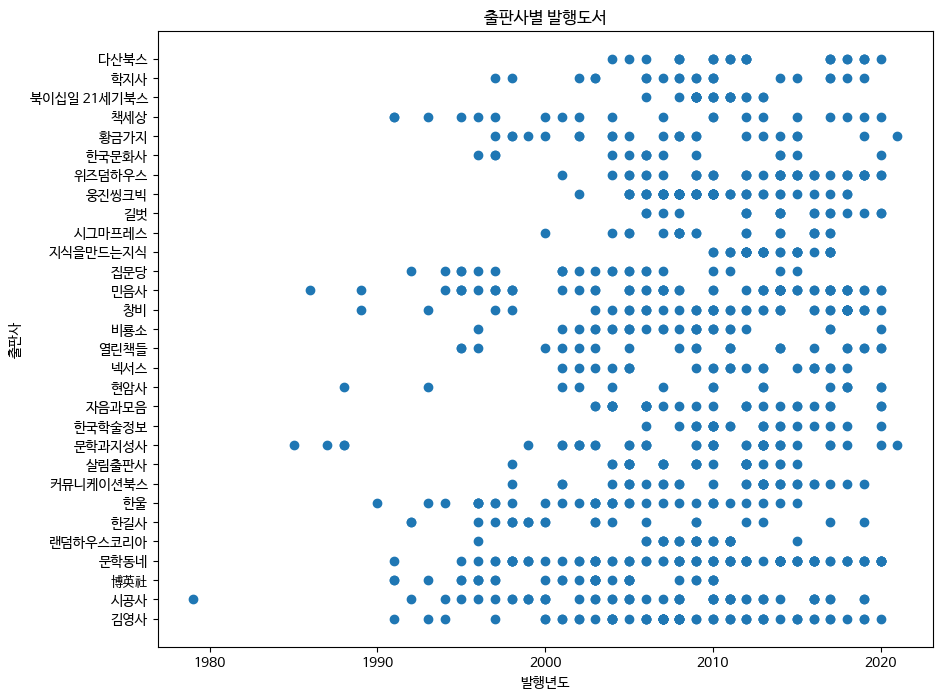

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(data1['발행년도'], data1['출판사'])
ax.set_title('출판사별 발행도서')
ax.set_xlabel('발행년도')
ax.set_ylabel('출판사')
fig.show()

In [23]:
plt.rcParams['lines.markersize']

6.0

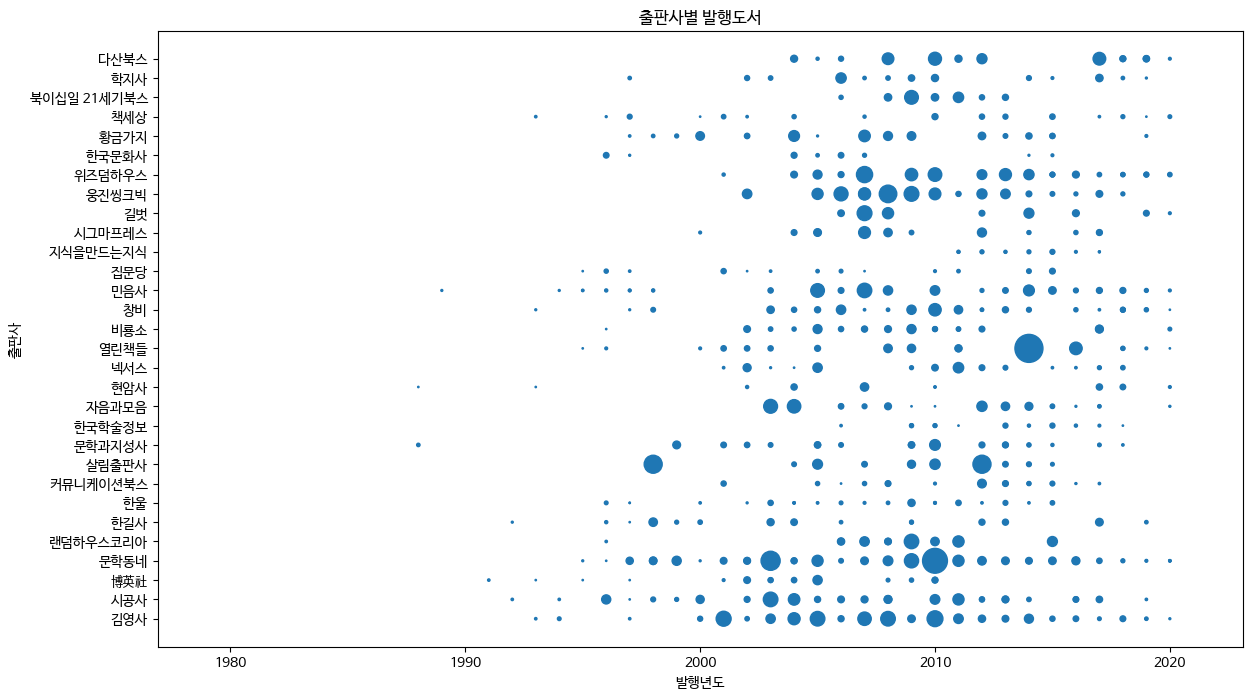

In [34]:
# 값 크기에 따른 산점도 크기 조절
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(data1['발행년도'], data1['출판사'], s=data1['대출건수'])
ax.set_title('출판사별 발행도서')
ax.set_xlabel('발행년도')
ax.set_ylabel('출판사')
fig.show()

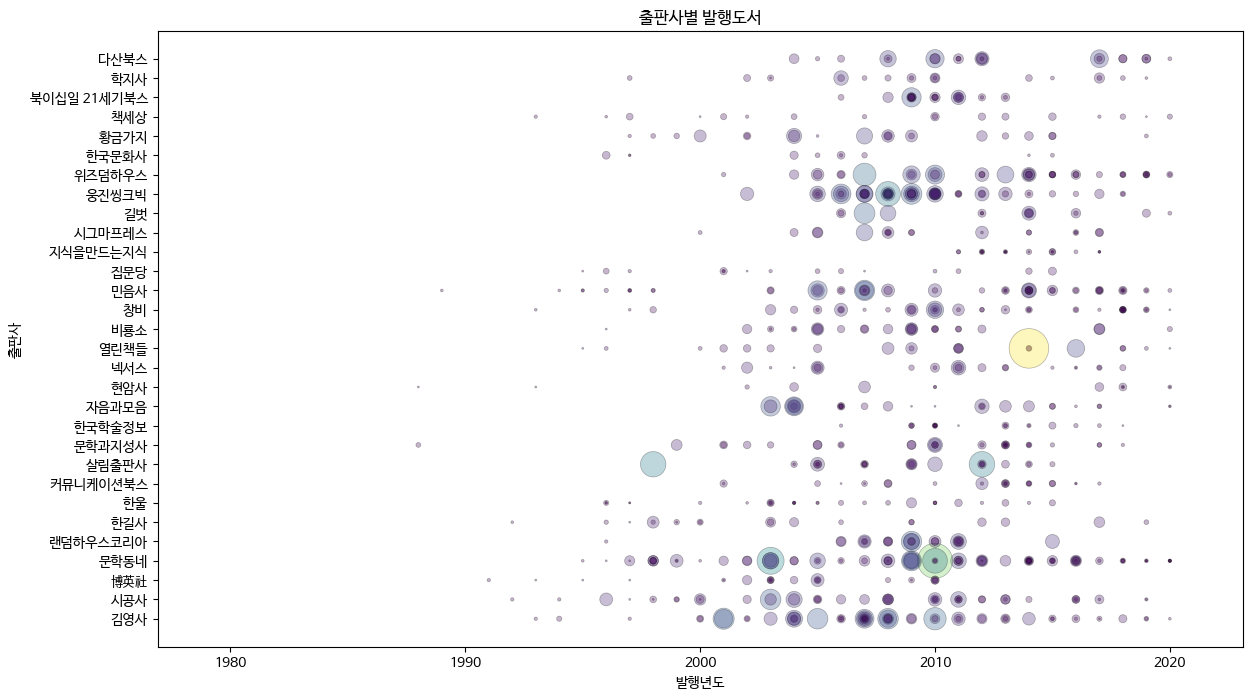

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8))

ax.scatter(data1['발행년도'], data1['출판사'],
           linewidths=0.5, edgecolors='k', alpha=0.3,
           s=data1['대출건수']*2, c=data1['대출건수'])

ax.set_title('출판사별 발행도서')
ax.set_xlabel('발행년도')
ax.set_ylabel('출판사')
fig.show()

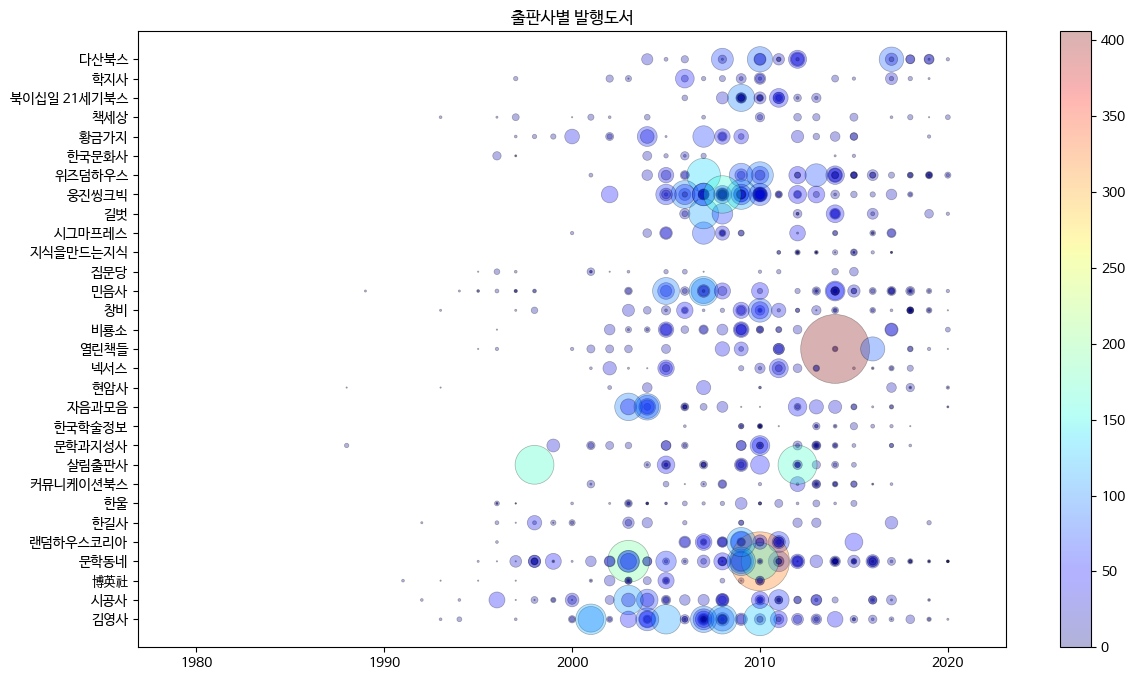

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8))

sc = ax.scatter(data1['발행년도'], data1['출판사'],
                linewidths=0.5, edgecolors='k', alpha=0.3,
                s=data1['대출건수']**1.3, c=data1['대출건수'], cmap='jet')

ax.set_title('출판사별 발행도서')

fig.colorbar(sc)
fig.show()